<a href="https://colab.research.google.com/github/FelipeFlorezO/Machine_Learning/blob/main/Producci%C3%B3n_Energ%C3%A9tica_Colombia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning con Python

Laboratorio Semana 2

Presentado por: Andrés Felipe Flórez Olivera - ICESI

Análisis de la producción energética en Colombia

Iniciamos importando las librerías a utilizar:

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
dataset="data-3.csv"
df= pd.read_csv(dataset)

Para identificar la cantidad de datos:

In [14]:
df

,COUNTRY,CODE_TIME,TIME,YEAR,MONTH,MONTH_NAME,PRODUCT,VALUE,DISPLAY_ORDER,yearToDate,previousYearToDate,share
0,Australia,JAN2010,January 2010,2010,1,January,Hydro,990.728000,1,1.647189e+04,NaN,0.047771
1,Australia,JAN2010,January 2010,2010,1,January,Wind,409.469000,2,4.940909e+03,NaN,0.019744
2,Australia,JAN2010,January 2010,2010,1,January,Solar,49.216000,3,9.082380e+02,NaN,0.002373
3,Australia,JAN2010,January 2010,2010,1,January,Geothermal,0.083000,4,9.960000e-01,NaN,0.000004
4,Australia,JAN2010,January 2010,2010,1,January,Total combustible fuels,19289.730000,7,2.143030e+05,NaN,0.930108
...,...,...,...,...,...,...,...,...,...,...,...,...
181910,United States,DEC2022,December 2022,2022,12,December,Non-renewables,292417.548132,23,3.355042e+06,3.320634e+06,0.791164
181911,United States,DEC2022,December 2022,2022,12,December,Others,8017.840957,24,5.393606e+04,4.899452e+04,0.021693
181912,United States,DEC2022,December 2022,2022,12,December,Other renewables aggregated,6133.265943,25,7.100997e+04,7.242158e+04,0.016594
181913,United States,DEC2022,December 2022,2022,12,December,Low carbon,146425.474534,26,1.749805e+06,1.670531e+06,0.396168


Para identificar los tipos de datos:

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181915 entries, 0 to 181914
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   COUNTRY             181915 non-null  object 
 1   CODE_TIME           181915 non-null  object 
 2   TIME                181915 non-null  object 
 3   YEAR                181915 non-null  int64  
 4   MONTH               181915 non-null  int64  
 5   MONTH_NAME          181915 non-null  object 
 6   PRODUCT             181915 non-null  object 
 7   VALUE               181915 non-null  float64
 8   DISPLAY_ORDER       181915 non-null  int64  
 9   yearToDate          181915 non-null  float64
 10  previousYearToDate  164810 non-null  float64
 11  share               181915 non-null  float64
dtypes: float64(4), int64(3), object(5)
memory usage: 16.7+ MB


Anáslisis exploratorio de los datos:

El dataset sin limpieza contiene 12 tipos de variables, las cuales se pueden identificar así:

1. Variables categóricas:

- COUNTRY: Nombre del país
- CODE_TIME: Código que representa MESAÑO
- TIME: Mes y año en formato (mes de año)
- MONTH_NAME: Nombre del mes
- PRODUCT: Tipo de energía

2. Variables numéricas:
- YEAR: Año
- MONTH: Mes
- VALUE: Cantidad de energía generada en GWh
- DISPLAY_ORDER: Orden para mostrar los productos
- yearToDate: Cantidad de electricidad generada hasta el mes actual en el año específico
- previousYearToDate: Histórico de la cantidad de energía generada para el año anterior hasta el mes actual en GWh (medida de comparación)
- share: Aporte del producto en la generación total de electricidad para el país (Va desde 0 hasta 1).

In [16]:
df.shape

(181915, 12)

Debido a que hay datos que no aportan información, ya que se repiten o no son relevantes, se procede a eliminar las siguientes columnas:
1. CODE_TIME
2. TIME
3. DISPLAY_ORDER

In [17]:
df.drop(['CODE_TIME', 'TIME', 'DISPLAY_ORDER'], axis=1, inplace=True)

Se trabajarán las siguientes columnas:
1. COUNTRY
2. YEAR
3. MONTH_NAME
4. PRODUCT
5. VALUE

Ahora podemos cambiar de nombre las variables:

In [97]:
df.rename(columns={'COUNTRY':'Pais',
                   'YEAR':'year',
                   'MONTH_NAME':'mes',
                   'MONTH' : 'Mes',
                   'PRODUCT':'energia',
                   'VALUE':'cantidad',
                   'share':'Aporte',
                   'yearToDate' : 'CantidadAnual',
                   'previousYearToDate' : 'Historico',
                   },
          inplace=True)

Ahora, debido a que nuestro interés se centra en explorar el caso para Colombia, se debe filtrar el conjunto de datos.

In [98]:
filt = (df['pais'] == 'Colombia')
df = df.loc[filt]

Podemos explorar la cantidad de datos que hay para el país Colombia

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2548 entries, 46557 to 180953
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pais           2548 non-null   object 
 1   ano            2548 non-null   int64  
 2   Mes            2548 non-null   int64  
 3   mes            2548 non-null   object 
 4   energia        2548 non-null   object 
 5   cantidad       2548 non-null   float64
 6   CantidadAnual  2548 non-null   float64
 7   Historico      2221 non-null   float64
 8   aporte         2548 non-null   float64
dtypes: float64(4), int64(2), object(3)
memory usage: 199.1+ KB


Realizando un análisis de la estadística descriptiva del conjunto de datos que tenemos en el momento:

In [100]:
df.describe()

,ano,Mes,cantidad,CantidadAnual,Historico,aporte
count,2548.000000,2548.000000,2548.000000,2548.000000,2221.000000,2548.000000
mean,2018.164835,6.489403,1738.288980,20859.387345,11305.965745,0.269870
std,2.505649,3.448808,2306.595288,27543.986218,17623.647931,0.356125
min,2014.000000,1.000000,-224.307384,-1301.589000,-1301.589000,-0.037199
25%,2016.000000,3.000000,5.847761,69.609358,62.829442,0.000915
50%,2018.000000,6.000000,319.006087,3825.121000,2120.757444,0.048288
75%,2020.000000,9.000000,3309.060848,47249.092000,15181.601989,0.532113
max,2022.000000,12.000000,7328.362363,85124.050543,81511.598561,1.037199


# Visualización de cantidad de energía producida por cada tipo de energía

<ipython-input-107-e103a83520e7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = df.groupby('energia').mean()['cantidad'].sort_values(ascending=False).head(5).index


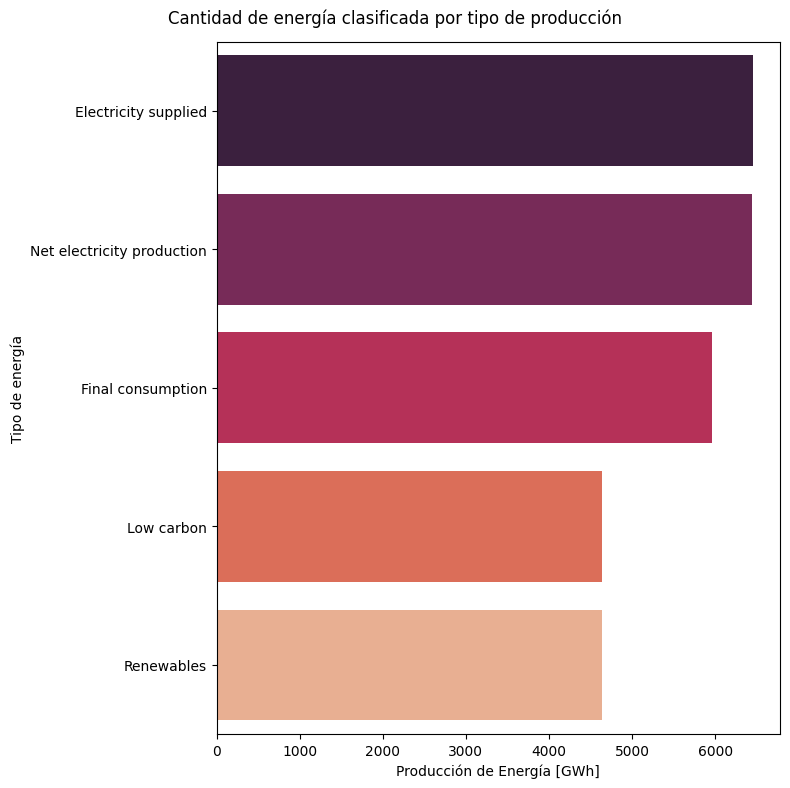

In [107]:
order = df.groupby('energia').mean()['cantidad'].sort_values(ascending=False).head(5).index

fig, ax = plt.subplots(figsize=(8, 8))
fig.suptitle('Cantidad de energía clasificada por tipo de producción')
sns.barplot(data=df, x='cantidad', y='energia', ax=ax, estimator='mean', errorbar=None, order=order, palette='rocket')
ax.set_xlabel('Producción de Energía [GWh]')
ax.set_ylabel('Tipo de energía')

plt.tight_layout()

Filtrando por energías:
- Eólica
- Solar
- Nuclear
- Gas natural
- Hidraúlica
- Carbón
- Otras

In [111]:
filt = ['Wind', 'Solar', 'Others', 'Nuclear', 'Natural gas', 'Hydro', 'Coal']
df_gen = df[df['energia'].isin(filt)]

In [112]:
df_gen.head()

,pais,ano,Mes,mes,energia,cantidad,CantidadAnual,Historico,aporte
46557,Colombia,2014,1,January,Hydro,3903.977,47249.092,NaN,0.684582
46558,Colombia,2014,1,January,Wind,5.648,69.482,NaN,0.000990
46559,Colombia,2014,1,January,Solar,1.065,8.947,NaN,0.000187
46561,Colombia,2014,1,January,Coal,521.938,5152.090,NaN,0.091524
46563,Colombia,2014,1,January,Natural gas,1031.146,13365.401,NaN,0.180817


Ahora podemos producir un gráfico de torta para ver el top 5

In [117]:
matriz = df_gen.groupby('energia').sum()['cantidad'].sort_values(ascending=False).head(5).index

<ipython-input-117-91850dc465f5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  matriz = df_gen.groupby('energia').sum()['cantidad'].sort_values(ascending=False).head(5).index


In [118]:
matriz

Index(['Hydro', 'Natural gas', 'Coal', 'Others', 'Solar'], dtype='object', name='energia')

Como se observa, se genera una clasificación del top 5 de las fuentes energética más renovables.

<ipython-input-146-50281445227a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  order = df_gen.groupby('energia').mean()['cantidad'].sort_values(ascending=False).head(3).index


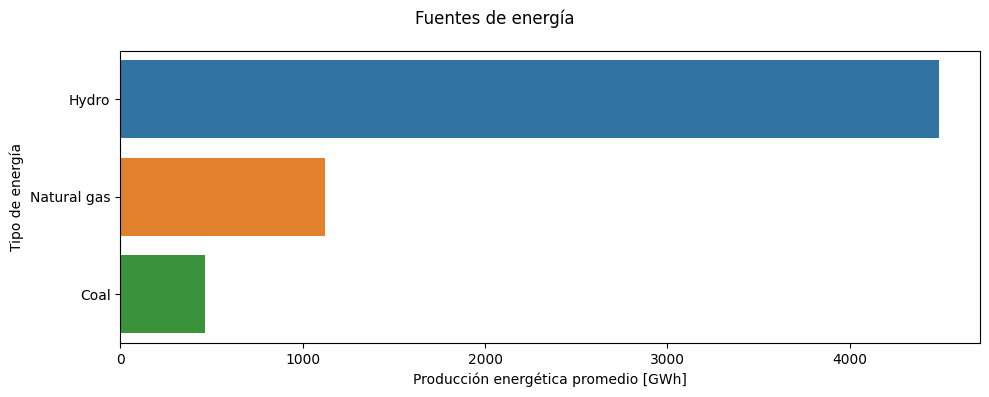

In [146]:
order = df_gen.groupby('energia').mean()['cantidad'].sort_values(ascending=False).head(3).index

fig, ax = plt.subplots(figsize=(10, 4))
fig.suptitle('Fuentes de energía')

sns.barplot(data=df_gen, x='cantidad', y='energia', ax=ax, estimator='mean', errorbar=None, order=order)
ax.set_xlabel('Producción energética promedio [GWh]')
ax.set_ylabel('Tipo de energía')

plt.tight_layout()

Finalmente, evaluando la pregunta de si se producen más energías renovables que no renovables, debemos evaluar la producción general de acuerdo a la clasificación binaria.

In [125]:
filt = ['Non-renewables', 'Renewables']
df_nr = df[df['energia'].isin(filt)]

In [128]:
total = df_nr.groupby('energia').sum()['cantidad'].sort_values(ascending=False)

<ipython-input-128-abcedf6d6b2e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total = df_nr.groupby('energia').sum()['cantidad'].sort_values(ascending=False)


Visualizando el conjunto de datos filtrado

In [129]:
df_nr.head()

,pais,ano,Mes,mes,energia,cantidad,CantidadAnual,Historico,aporte
46572,Colombia,2014,1,January,Renewables,4010.411,48591.614,NaN,0.703246
46573,Colombia,2014,1,January,Non-renewables,1692.303,20435.682,NaN,0.296754
47563,Colombia,2014,2,February,Renewables,3703.603,48591.614,NaN,0.690345
47564,Colombia,2014,2,February,Non-renewables,1661.258,20435.682,NaN,0.309655
48554,Colombia,2014,3,March,Renewables,4313.454,48591.614,NaN,0.739553


In [130]:
total = df_nr.groupby('energia').sum()['cantidad'].sort_values(ascending=False)

<ipython-input-130-abcedf6d6b2e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total = df_nr.groupby('energia').sum()['cantidad'].sort_values(ascending=False)


Obteniendo así en un diagrama de torta:

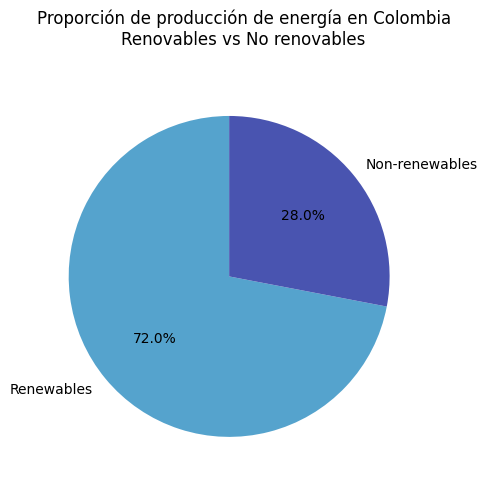

In [148]:
fig, ax = plt.subplots(figsize=(5, 5))
fig.suptitle('Proporción de producción de energía en Colombia\nRenovables vs No renovables')

ax.pie(x=total, labels=total.index, autopct='%.1f%%', startangle=90, colors=sns.color_palette("icefire"))

plt.tight_layout()